<a href="https://colab.research.google.com/github/Forest-Dewberry/DEEP-IUSE/blob/master/Visualizing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tutorial: Understanding Data Science**
Being a data scientist usually requires understanding of programming, statistics, and some knowledge of the subject at hand. This tutorial uses a data set collected by Auburn University's Data Enabled - Process Systems Engineering (DE-PSE) laboratory. The data set consists of Channel State Information (CSI) collected by sending wifi packets through a bed of wood chips at four (4) different moisture levels. The method has been tried and confirmed with grain silos, according to previous studies: some dimension of wifi CSI *is* dependent on the substrate moisture content. 10 measurements were taken at each moisture level, randomizing the chip spatial placement in between by simply shaking the plexiglass box the chips were in. The result is a highly dimensional data set. Using proper analysis tools, we can select features of the wifi data that associate with moisture content while disregarding those that associate with the spacial packing of the wood.

The goal of this tutorial is for the reader to understand the methodology used to interpret highly dimensional data for the purpose of practical applications.


# Data Vizualization 
Data visualization allows the data scientist to see similarities and differences in the data, understand how features relate, identify important features, and display results in a coherent form. This section shows some tools used to visualize data.
1. Histogram
2. Scatter Plots
3. Pairwise plot
4. Correlation heatmap
5. Parallel plot
6. 3D scatter plot
7. 3D scaled data



First import all libraries needed to model the data effectively. Putting all the imports first allows you to update continuously in order to make sure the libraries needed are updated as necessary.

## Matplotlib library

In [0]:
import scipy.io as spio
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd

Now the data needs to be loaded. The data is loaded as a numpy array.

In [0]:
# 200 x 387 features.
mat=spio.loadmat('X_Stat.mat')
X=mat['X']

## Feature Selection
 
There are several methods for selecting features to use in the model but for now we will focus on 87. The next cell will split the data and focus only on the 87 features over 4 different moisture levels.

In [0]:
# Decide which features to be used for modeling
Data_start=300   # Starting Index for Feature selection 
Data_stop=387    # End Index for feature selection

# Each MC has 10 Diff Samples
# Selection of data from 4 different moisture levels---- Set 3, Set 8, Set 16 and Set 19
X1=X[20:30,Data_start:Data_stop]
X2=X[70:80,Data_start:Data_stop]
X3=X[150:160,Data_start:Data_stop]
X4=X[180:190,Data_start:Data_stop]

# Stack the data togethor
X_new=np.concatenate((X1,X2,X3,X4))

# Check the shape of the newly stacked samples based on user requrement
np.shape(X_new)

(40, 87)

So again this new array is a numpy array. We will convert this array into a pandas dataframe. This will make it easier to handle the data and plot the features.

In [0]:
# Numpy array to Pandas Dataframe
df = pd.DataFrame(X_new)

# Adding a target column 
targets = []
c = 1
for x in range(40):
    if c <= 10:
        targets.append('one')
    elif c <= 20:
        targets.append('two')
    elif c <= 30:
        targets.append('three')
    elif c <= 40:
        targets.append('four')
    c = c + 1

df['Target'] = targets

## Techniques

### Histograms

The most simple way to vizualize data is in one dimension. One easy way to view one feature at a time is to view it as a histogram. The dataframe that was just made already has a built in function that creates a histogram of every feature (column). This built in function has several parameters that can be adjusted in order to format the histograms in the way that is needed. Several are used to format but an easy way to find the parameters is to search the documentation directly in Jupyter Notebook by typing the command and a question mark after it.

In [0]:
# Example of searching documentation 
pd.DataFrame.hist?

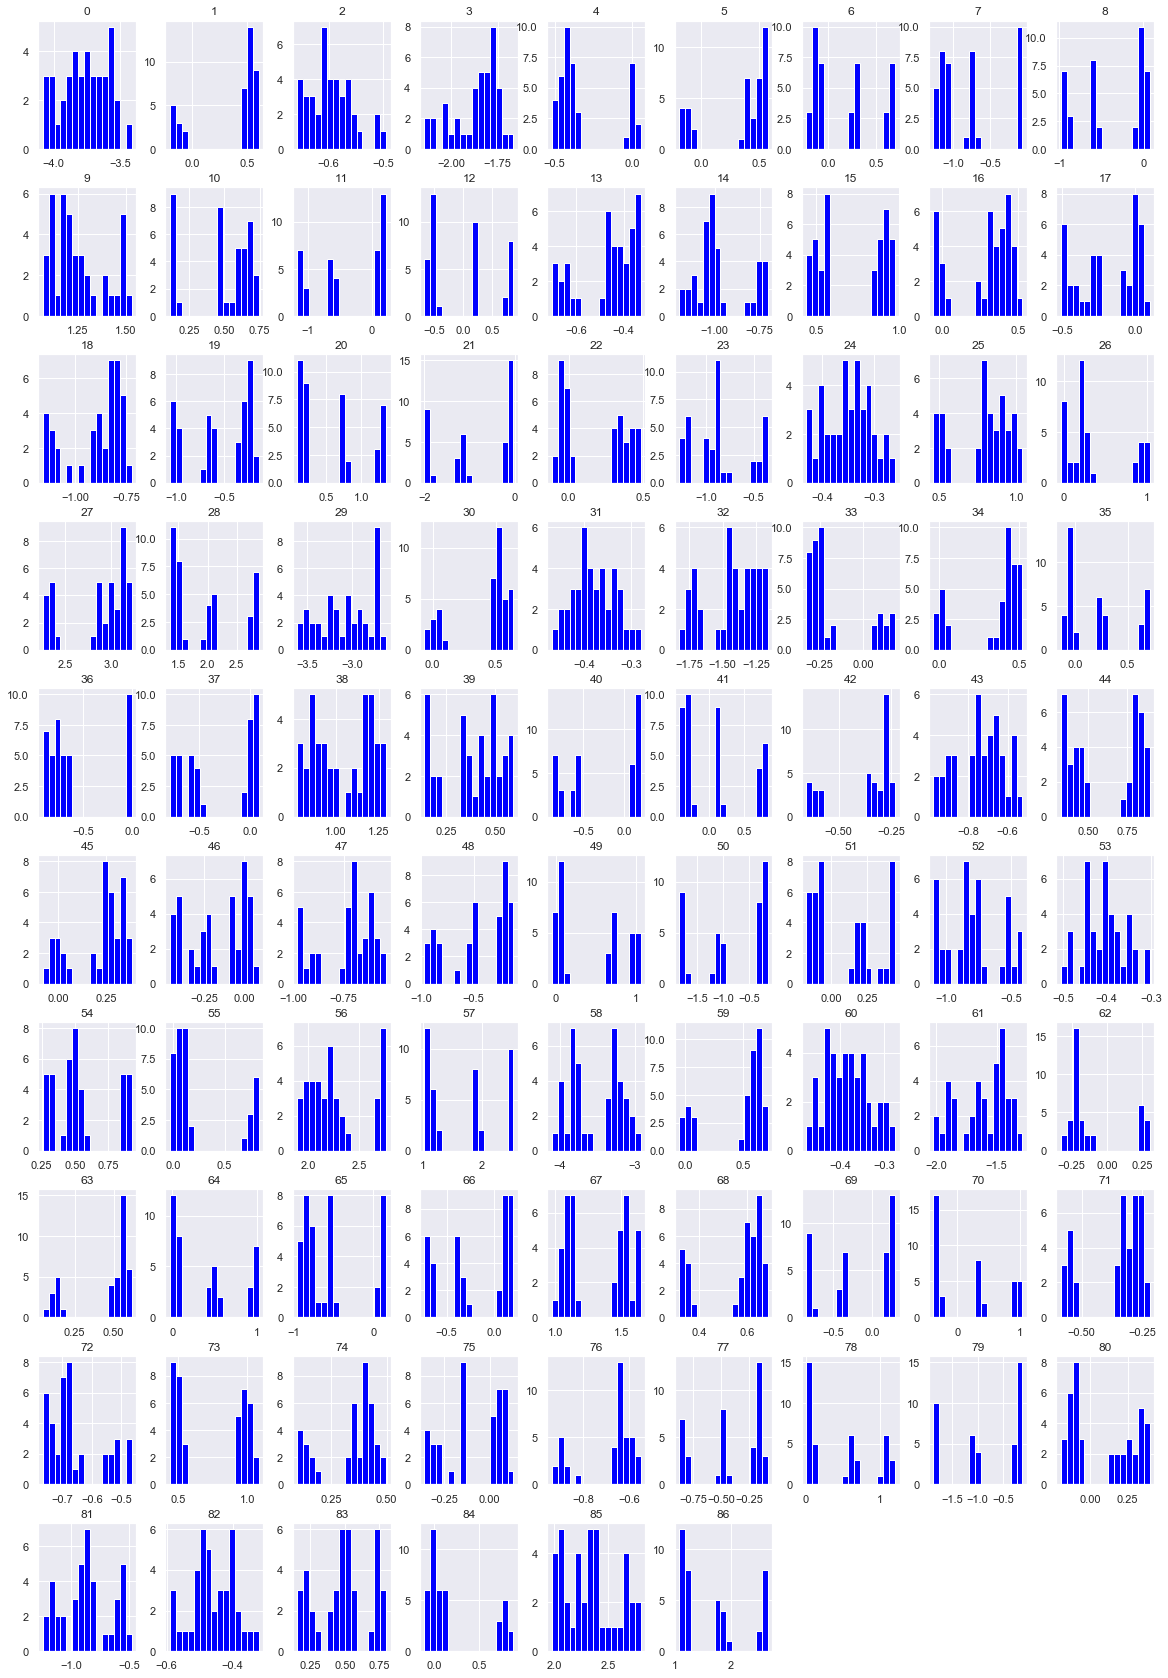

In [0]:
# Pandas built in histogram function using matplotlib
hist = df.hist(bins = 15, figsize=(20,30), layout=(10,9), color='blue')

### Scatter Plots

Scatter plots are good for viewing the relationship between two variables rather than a single variable. 

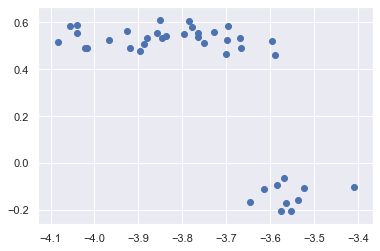

In [0]:
# Basic scatter plot plotting the first two features
plt.scatter(df.iloc[:,0], df.iloc[:,1])

Now lets add another dimension to the graph. We will do this by adding a color filter that filters based on the Targets feature we built at the beginning. The reason to switch to seaborn is the Target column is a series of strings and the color filter for matplotlib only accepts numerical values 

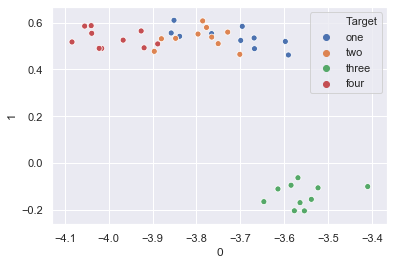

In [0]:
# Adding a color filter to filter by the moisture level
sns.scatterplot(df.iloc[:,0], df.iloc[:,1], hue=df['Target'])

We can add another dimension to the graph by adding a size filter. So now the first, second, and third features are being displayed along with what moisture level each feature is.

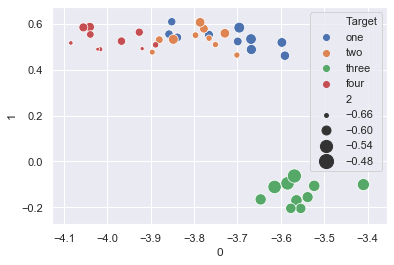

In [0]:
# Adding a size filter to filter by the 3rd feature 
sns.scatterplot(df.iloc[:,0], df.iloc[:,1], hue=df['Target'], size=df.iloc[:,2], sizes=(15,200))

Now we will change the style filter to filter by moisture level and the color will filter by the third feature of the dataset while the size filters by the fourth dataset. Effectively graphing 5 dimensions of the data set on one graph.

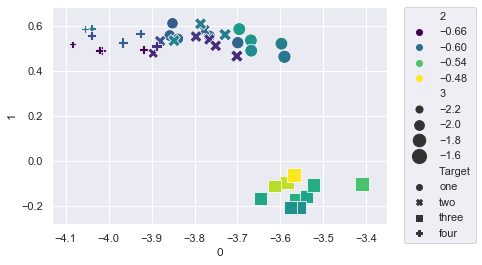

In [0]:
# Changing color filter to filter by the third feature and size by the fourth and target to change the shape of marker
sns.scatterplot(df.iloc[:,0], df.iloc[:,1]
                , hue=df.iloc[:,2]
                , palette='viridis'
                , size=df.iloc[:,3]
                , sizes=(50,200)
                , style=df['Target'])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Now that we have looked at various ways to increase dimensionality of scatter plots, let's look at each feature versus the moisture level of the sample.

In [0]:
# Create a new column in df for an array of values with a range of 40
moisture_level = []
for i in range(1, 41):
    moisture_level.append(i)
    
# Create a colors array
colors = []
c = 1
for x in range(40):
    if c <= 10:
        colors.append('red')
    elif c <= 20:
        colors.append('blue')
    elif c <= 30:
        colors.append('green')
    elif c <= 40:
        colors.append('purple')
    c = c + 1

df['Color'] = colors

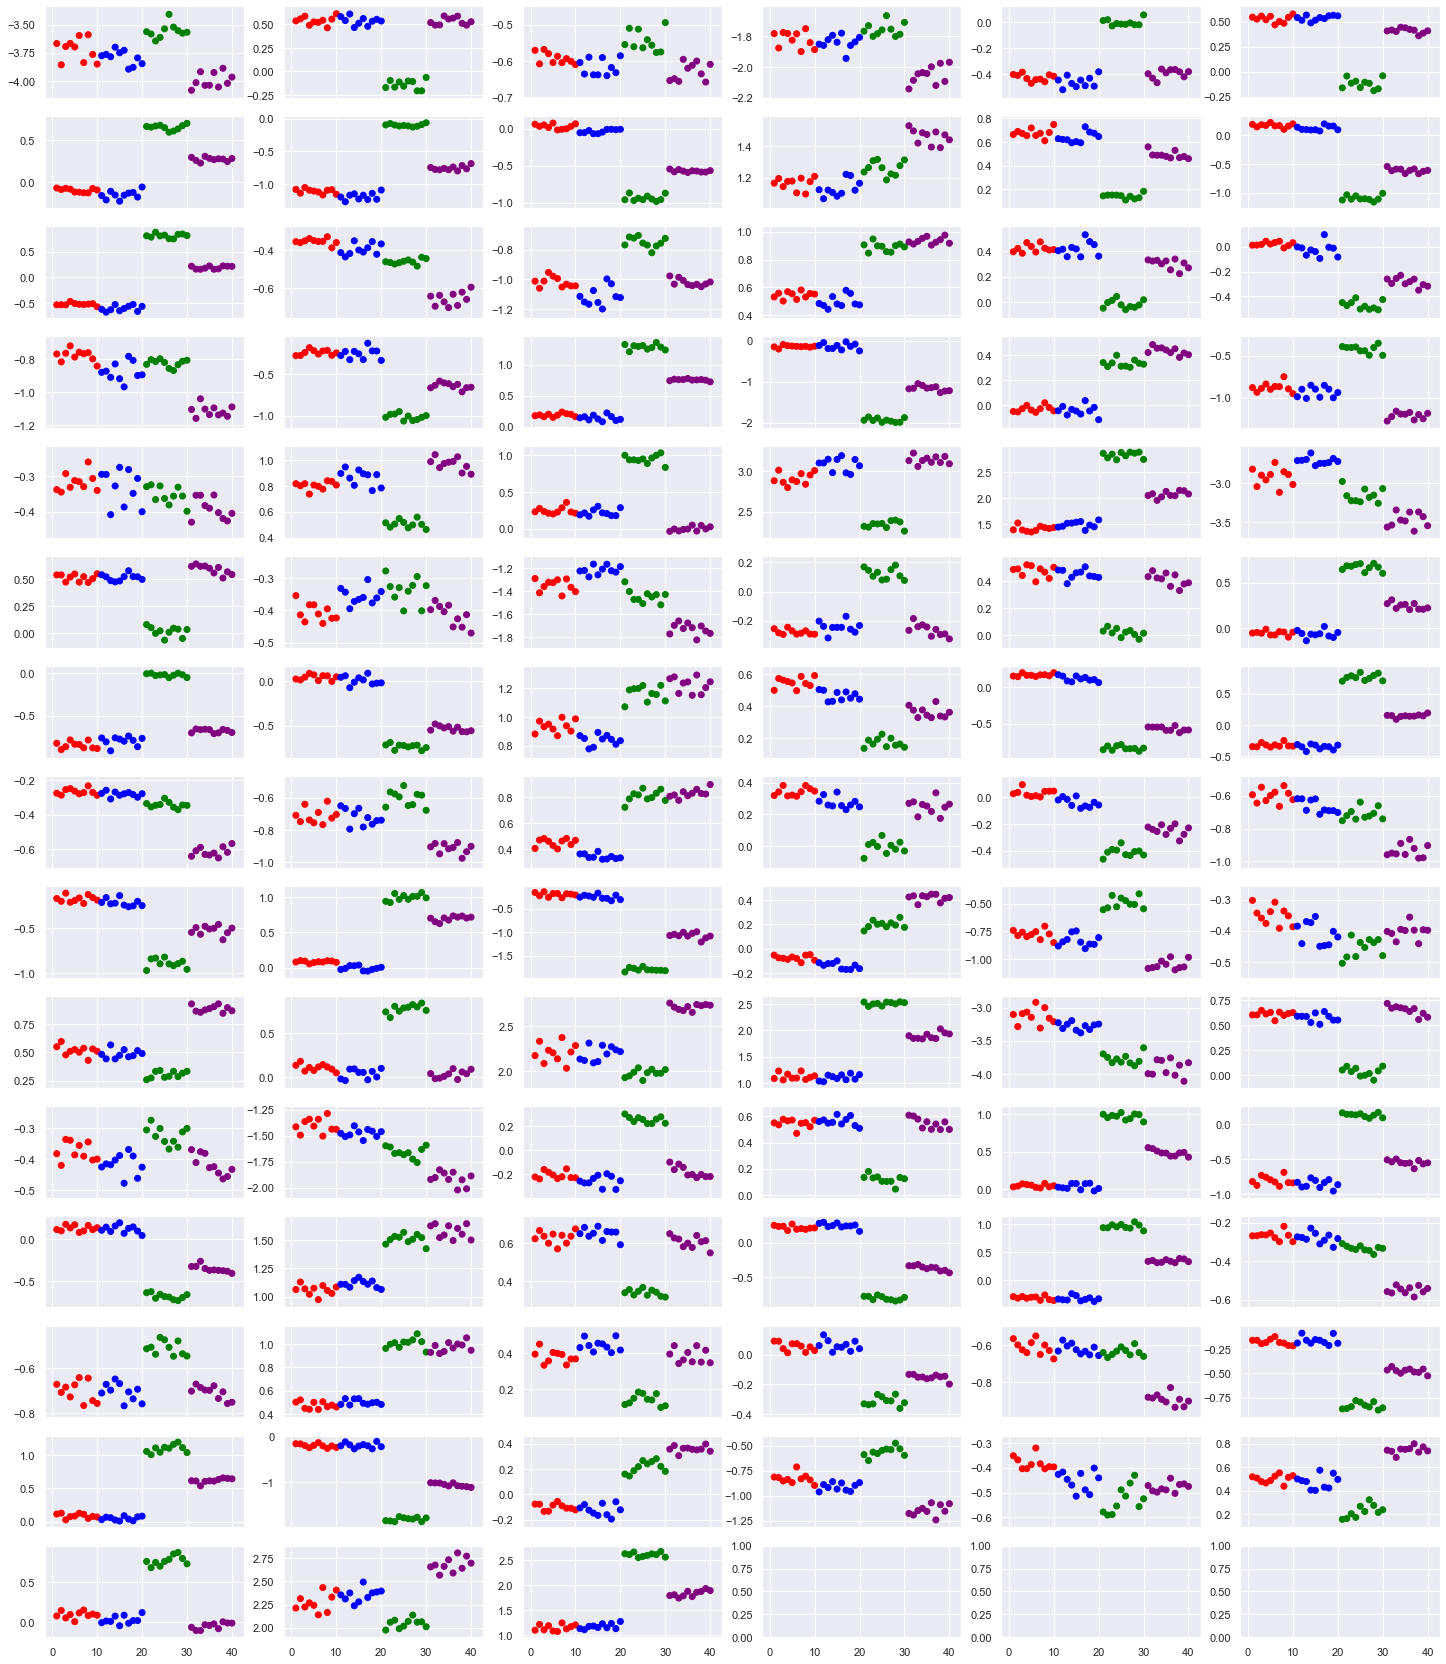

In [0]:
# Plots every feature versus the moisture level 
fig, axarr = plt.subplots(15, 6, figsize=(25,30), sharex=True)     
c= 0
for i in range(15):
    for j in range(6):
        plt.sca(axarr[i, j])                        
        axarr[i, j].scatter(moisture_level, df.iloc[:,c], c=df['Color']) 
        c= c + 1
        if c ==87:
            break

### Pairwise Plot

A pairwise plot is like a scatter plot but plots each feature against every other featrue of dataset. For ease of demonstration only the first six features will be used to display the technique. The main diagonal line shows the distribution of the data.

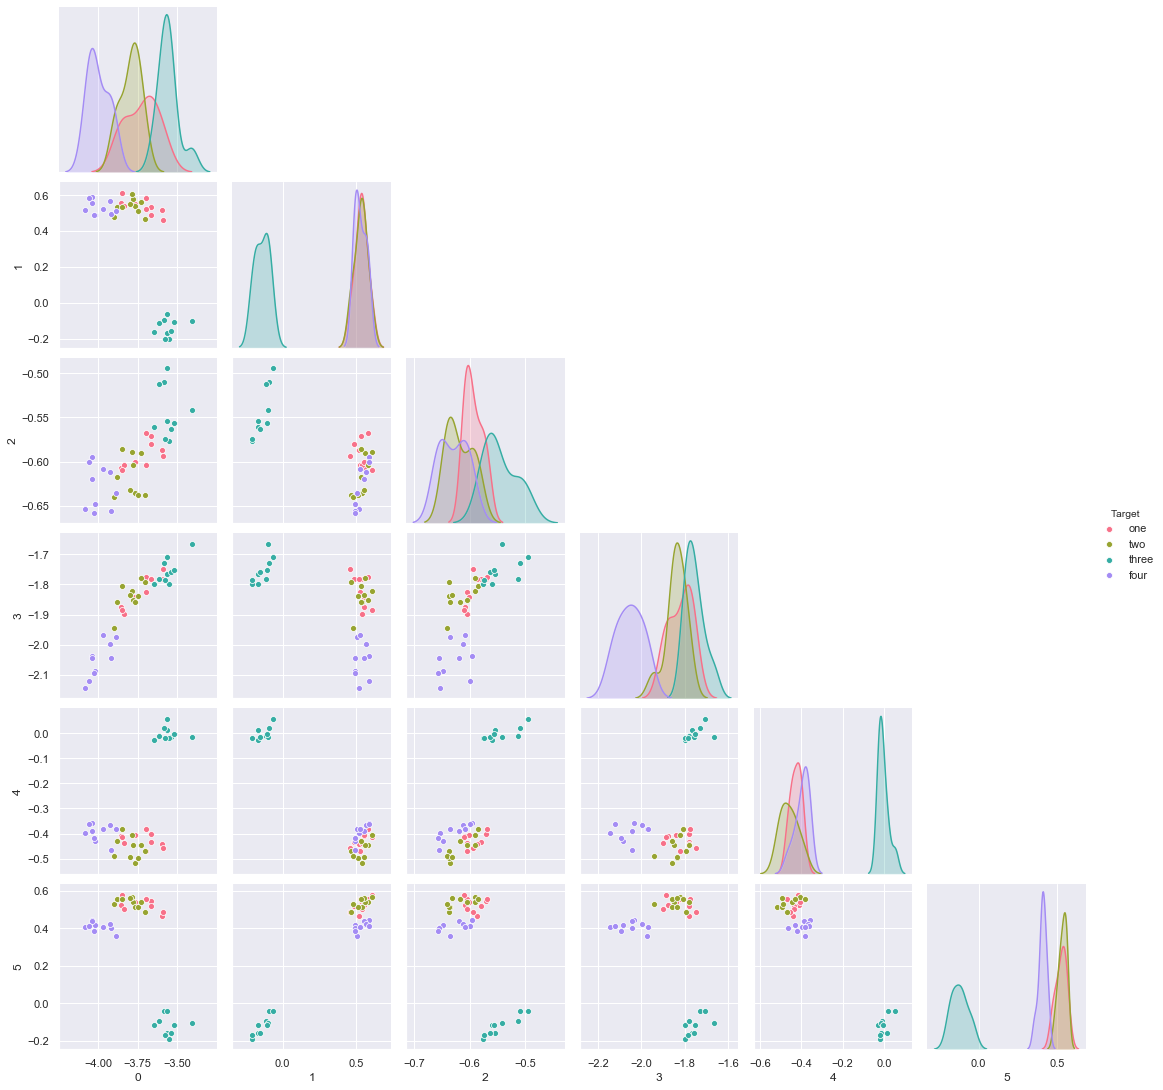

In [0]:
# Take the first six feautures in the data frame. These features can be changed 
x_p = df.iloc[:, :6]
x_p['Target'] = targets
sns.pairplot(x_p, hue = "Target", palette ='husl', corner=True)

### Correlation Heatmap

Another great way to view relationships between variables is a correlation heatmap. This correlation heatmap is like the pairwise plot but looks at the correlation between all the variables rather than plotting the relationship. 

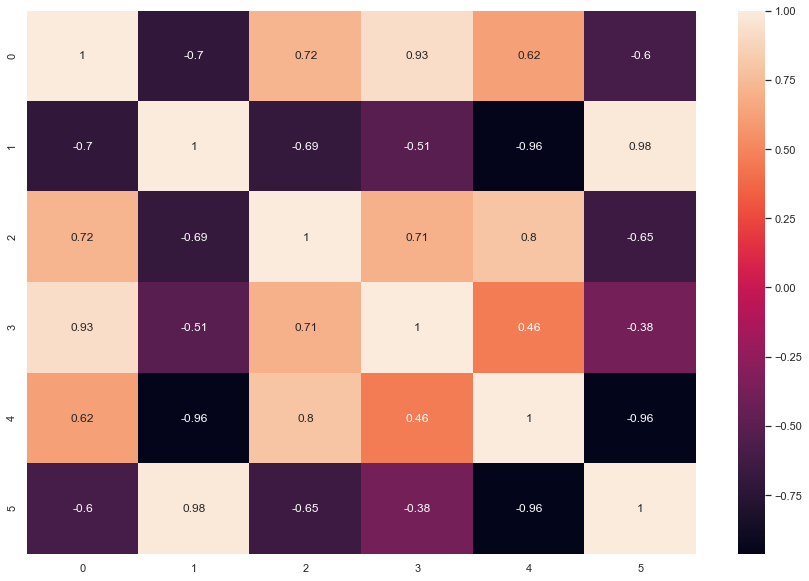

In [0]:
# Building a correlation heatmap of the first six points 
# Correlation matrix
corr = x_p.corr()

fig = plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True)

## Plotly Library

Another option is the plotly library. It is an interactive library 

In [0]:
# Imports 
import plotly.express as px
from plotly.subplots import make_subplots
import cufflinks as cf
import plotly
import plotly.offline as py
import plotly.graph_objs as go

cf.go_offline() # required to use plotly offline (no account required).
py.init_notebook_mode() # graphs charts inline (IPython).

In [0]:
# Plotting using plotly express

fig = px.scatter(df, x=1, y=2, color='Target')
fig.show()

In [0]:
# Making subplots 
fig = make_subplots(rows=15, cols=6)

c= 0
for i in range(1,16):
    for j in range(1,7):
        fig.add_trace(go.Scatter(y=df.iloc[:,c], 
                         mode='markers',
                         marker=dict(
                                size=8,
                                color=df['Color'], 
                                )), row=i, col=j)
        c= c + 1
        if c ==87:
            break

fig.update_layout(
    autosize=False,
    width=1000,
    height=2000,
    showlegend=False)

fig.show()